<a href="https://colab.research.google.com/github/srisuneha/The-Sparks-Foundation/blob/main/Task%201/Sparks_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NAME : KUNDURU SAI NAGA SRI SUNEHA**

## **TASK 1- Question:** Predict the percentage of an student based on the no. of study hours 

**Import the libraries**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sn
import plotly.express as px
import statsmodels
import plotly.graph_objects as go
import matplotlib.pyplot as plt
%matplotlib inline

**Read the data**

In [ ]:
data = pd.read_csv('https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv')

**Display the data**

In [ ]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


**Plotting the Data** (To get a best fitting line.)


In [ ]:
fig = px.scatter(
    data_frame=data, x='Hours', y='Scores', color='Scores',
    trendline='ols',trendline_color_override='red',size = 'Scores',template='gridon'
)
fig.update_layout(title_text = 'Hours of Study v/s Percentage Score')
fig.show()

In [ ]:
train = data.iloc[:, :-1].values
test = data.iloc[:, 1].values

**Split the dataset into Training and Testing dataset**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train,test, test_size = 0.2, random_state = 0)

**Build the Regression Model**

In [ ]:
from sklearn.linear_model import LinearRegression
Reg1 = LinearRegression()
Reg1.fit(train,test)

LinearRegression()

In [ ]:
line = Reg1.coef_*train+Reg1.intercept_
x_range = np.linspace(train.min(),train.max(),100)
y_range = Reg1.predict(x_range.reshape(-1,1))
fig = go.Figure([
    go.Scatter(x = train.squeeze(),y = test,name='train',mode='markers'),
    go.Scatter(x = x_range,y = y_range,name='prediction')
])
fig.show()

In [ ]:
# Generating the random dataset
x_range = np.linspace(train.min(),train.max(),25)
y_pred = Reg1.predict(x_range.reshape(-1,1))

fig = px.scatter(x = test,y = y_pred,labels={'x': 'ground truth', 'y': 'prediction'})
fig.add_shape(type="line",line=dict(dash = 'dash'),
             x0 = test.min(),y0=test.min(),
             x1 = test.max(),y1=test.max())
fig.show()

**Prediction Chart**

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

x_range = np.linspace(train.min(), train.max(), 100)
y_range = model.predict(x_range.reshape(-1, 1))

fig = go.Figure([
    go.Scatter(x=X_train.squeeze(), y=y_train, name='train', mode='markers'),
    go.Scatter(x=X_test.squeeze(), y=y_test, name='test', mode='markers'),
    go.Scatter(x=x_range, y=y_range, name='prediction')
])
fig.show()

**Predict the output(Y_axis values) of Test DataSet**

In [ ]:
Y_pred = Reg1.predict(X_test)
print(Y_pred)

[17.14737849 33.76624426 74.8246185  26.92318188 60.16091341]


In [ ]:
df = pd.DataFrame({'Actual':y_test, 'Predicted':Y_pred})
df

,Actual,Predicted
0,20,17.147378
1,27,33.766244
2,69,74.824618
3,30,26.923182
4,62,60.160913


/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).



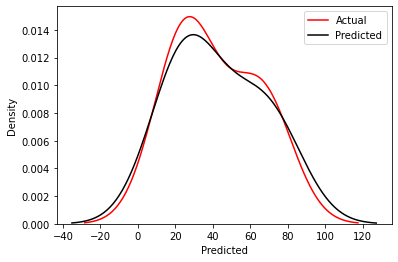

In [ ]:
sn.distplot(df['Actual'],hist=False,label='Actual',color='red')
sn.distplot(df['Predicted'],hist=False,label='Predicted',color='black')
plt.legend()
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



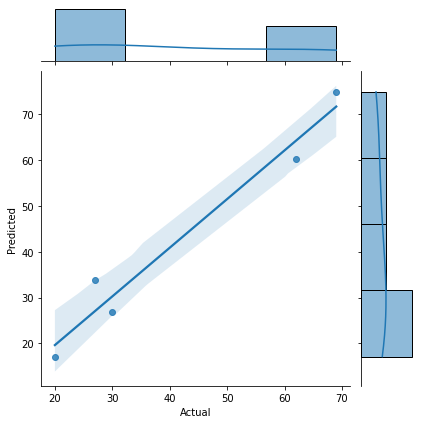

In [ ]:
sn.jointplot(df['Actual'],df['Predicted'],kind='reg')

**To Check How well the Linear Regression Model Fits on Training and Test DataSet**

In [ ]:
print("Training Score: ", Reg1.score(X_train, y_train))
print("Testing Score: ", Reg1.score(X_test,y_test))


Training Score:  0.9512837351709387
Testing Score:  0.9491748734859172


**Bar Plot to Observe the difference Between Actual and Predicted Outcome on Test Data Set**

In [ ]:
px.bar(data_frame=df,template='xgridoff')

** Evaluating model**

In [ ]:
import numpy as np
from sklearn import metrics

print(" Mean Absolute Error: ", metrics.mean_absolute_error(y_test, Y_pred))
print(" Mean Squared Error: ",metrics.mean_squared_error(y_test,Y_pred))
print(" Root Mean Squared Error: ",np.sqrt(metrics.mean_squared_error(y_test,Y_pred)))
print(" Explained Variance Score: ",metrics.explained_variance_score(y_test,Y_pred))

 Mean Absolute Error:  4.071877793635605
 Mean Squared Error:  20.138948129940175
 Root Mean Squared Error:  4.487643939746131
 Explained Variance Score:  0.9515224335188082


**Predicting score**

In [ ]:
hours = 9.25
pred_score = Reg1.predict([[9.25]])
print(" The Predicted Score of the Student is :",round(pred_score[0]))

 The Predicted Score of the Student is : 93
